In [1]:
import os, subprocess
import json
import uproot3
import awkward as ak
import numpy as np
from coffea import processor, util, hist
import pickle
import pandas as pd

from plotter import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
lumis = {}
lumis['2016'] = 35.9
lumis['2017'] = 41.5
lumis['2018'] = 59.2

with open('xsec.json') as f:
  xs = json.load(f)

with open('pmap.json') as f:
  pmap = json.load(f)

In [3]:
year = '2017'
nfiles = len(subprocess.getoutput("ls infiles-split/"+year+"*.json").split())
outsum = processor.dict_accumulator()

In [4]:
# Read the histogram from the pickle file
fatjetkin = pickle.load(open('pickles/'+year+'_fatjetkin.pkl','rb')).integrate('region','muoncontrol')
smalljetkin = pickle.load(open('pickles/'+year+'_smalljetkin.pkl','rb')).integrate('region','muoncontrol')
smalljetflav = pickle.load(open('pickles/'+year+'_smalljetflav.pkl','rb')).integrate('region','muoncontrol')
muonkin = pickle.load(open('pickles/'+year+'_muonkin.pkl','rb')).integrate('region','muoncontrol')

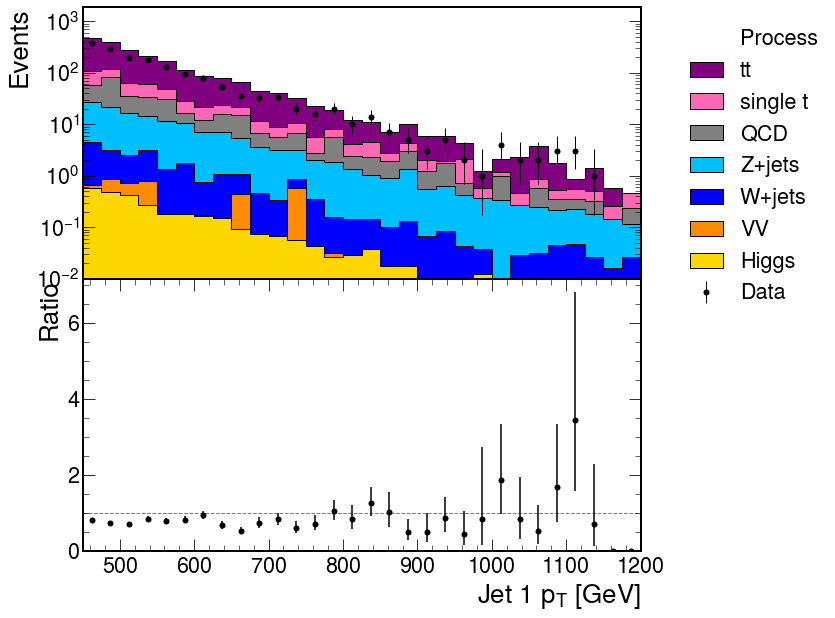

In [5]:
plot_datamc_muoncr(fatjetkin.sum('eta1','ddb1'), year+'/datamc_mucr_pt1', 'Jet 1 $p_T$ [GeV]')

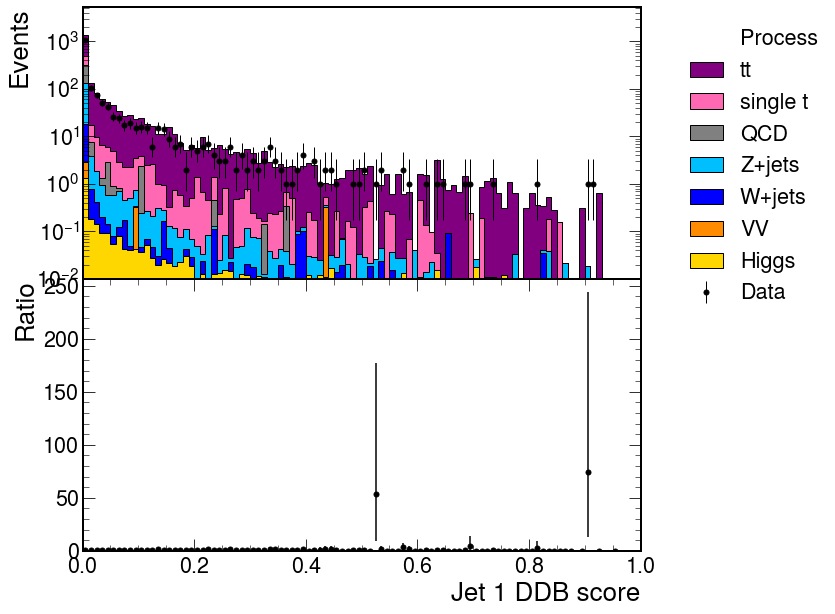

In [6]:
plot_datamc_muoncr(fatjetkin.sum('eta1','pt1'), year+'/datamc_mucr_ddb1', 'Jet 1 DDB score')

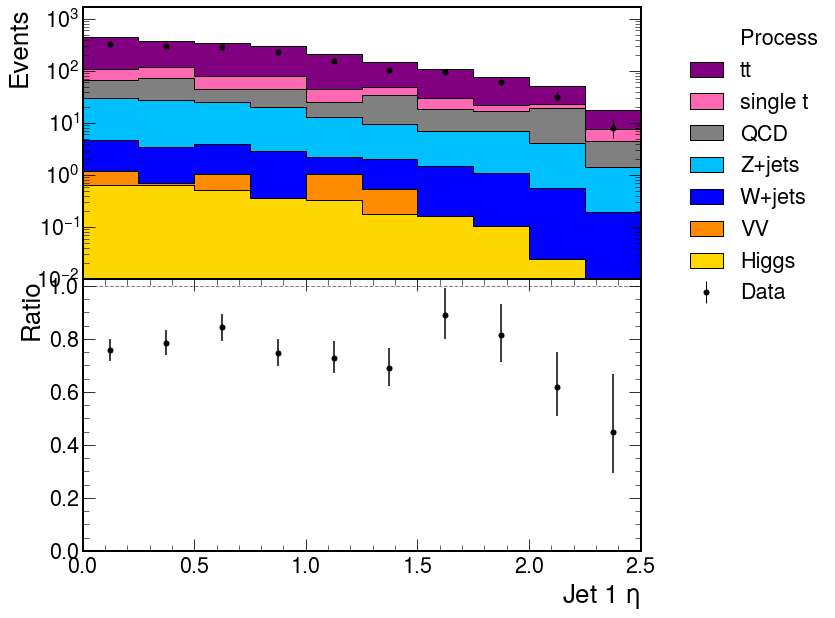

In [7]:
plot_datamc_muoncr(fatjetkin.sum('pt1','ddb1'), year+'/datamc_mucr_eta1', 'Jet 1 $\eta$',xlim=2.5)

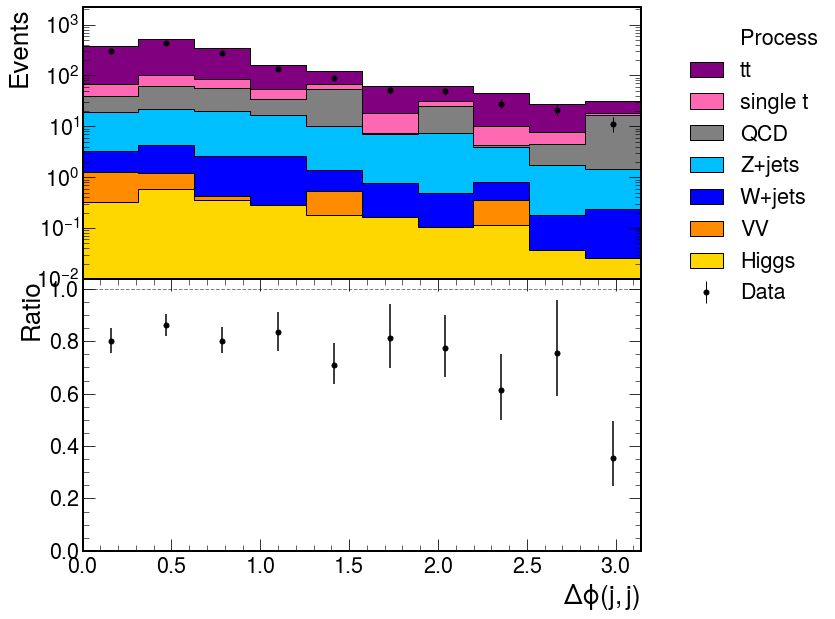

In [8]:
plot_datamc_muoncr(smalljetkin.sum('deta','mjj','ddb1'), year+'/datamc_mucr_dphi', '$\Delta \phi (j,j)$',xlim=3.14)

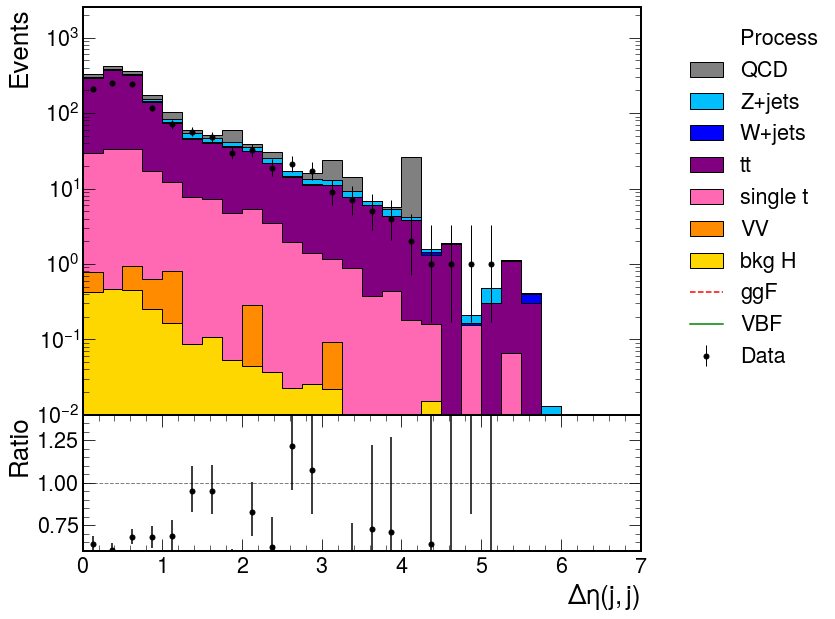

In [9]:
plot_datamc_ggfvbf(smalljetkin.sum('dphi','mjj'), year+'/datamc_mucr_deta', '$\Delta \eta (j,j)$',xlim=0)

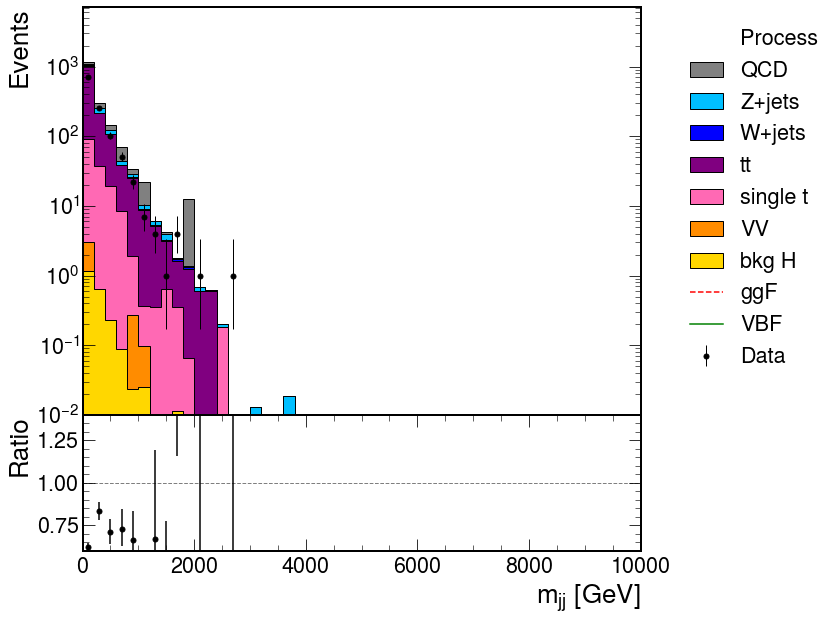

In [10]:
plot_datamc_ggfvbf(smalljetkin.sum('deta','dphi'), year+'/datamc_mucr_mjj', '$m_{jj}$ [GeV]',xlim=0)